# Customer Churn Prediction 

## Data Exploration 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [109]:
df = pd.read_csv(r"C:\Users\hp\Downloads\ML Project\telecom_churn.csv")

In [110]:
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [111]:
df[df['Churn'] == 1]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
15,1,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4
21,1,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7
33,1,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8
41,1,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6
...,...,...,...,...,...,...,...,...,...,...,...
3301,1,84,1,0,0.00,0,280.0,113,65.0,10.11,10.4
3304,1,71,0,0,0.00,4,186.1,114,49.0,9.93,13.8
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7
3322,1,62,1,0,0.00,4,321.1,105,78.0,13.28,11.5


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [113]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [114]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [115]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [116]:
df_cat = df.copy()
df_cat['Churn'] = df_cat['Churn'].apply(lambda x: "Yes" if x == 1 else 'No')
df_cat['DataPlan'] = df_cat['DataPlan'].apply(lambda x:"Yes" if x == 1 else 'No')

In [117]:
df_cat

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,No,128,1,Yes,2.70,1,265.1,110,89.0,9.87,10.0
1,No,107,1,Yes,3.70,1,161.6,123,82.0,9.78,13.7
2,No,137,1,No,0.00,0,243.4,114,52.0,6.06,12.2
3,No,84,0,No,0.00,2,299.4,71,57.0,3.10,6.6
4,No,75,0,No,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,No,192,1,Yes,2.67,2,156.2,77,71.7,10.78,9.9
3329,No,68,1,No,0.34,3,231.1,57,56.4,7.67,9.6
3330,No,28,1,No,0.00,2,180.8,109,56.0,14.44,14.1
3331,No,184,0,No,0.00,2,213.8,105,50.0,7.98,5.0


## Exploratory Data Analysis 

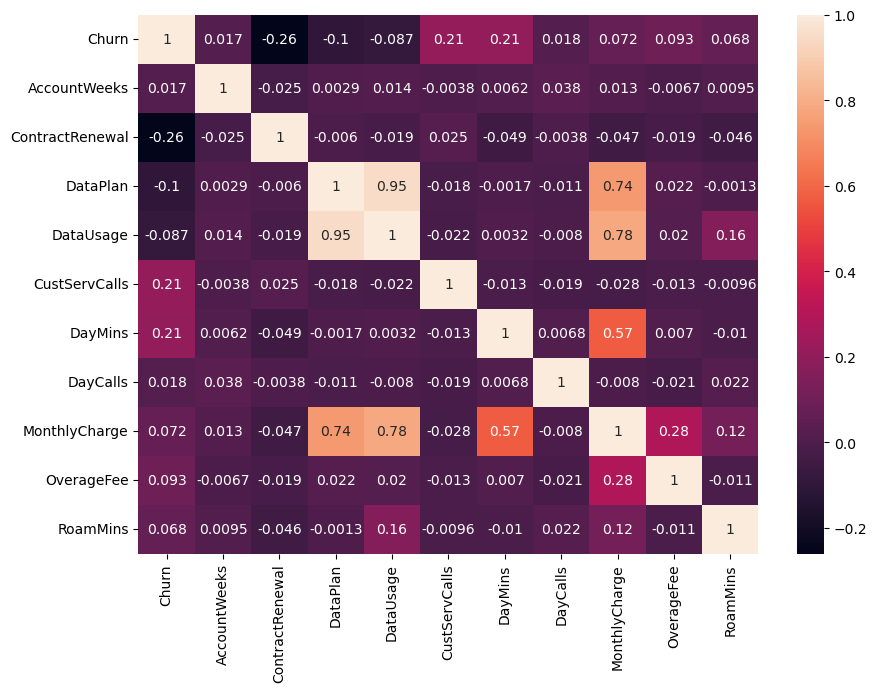

In [118]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

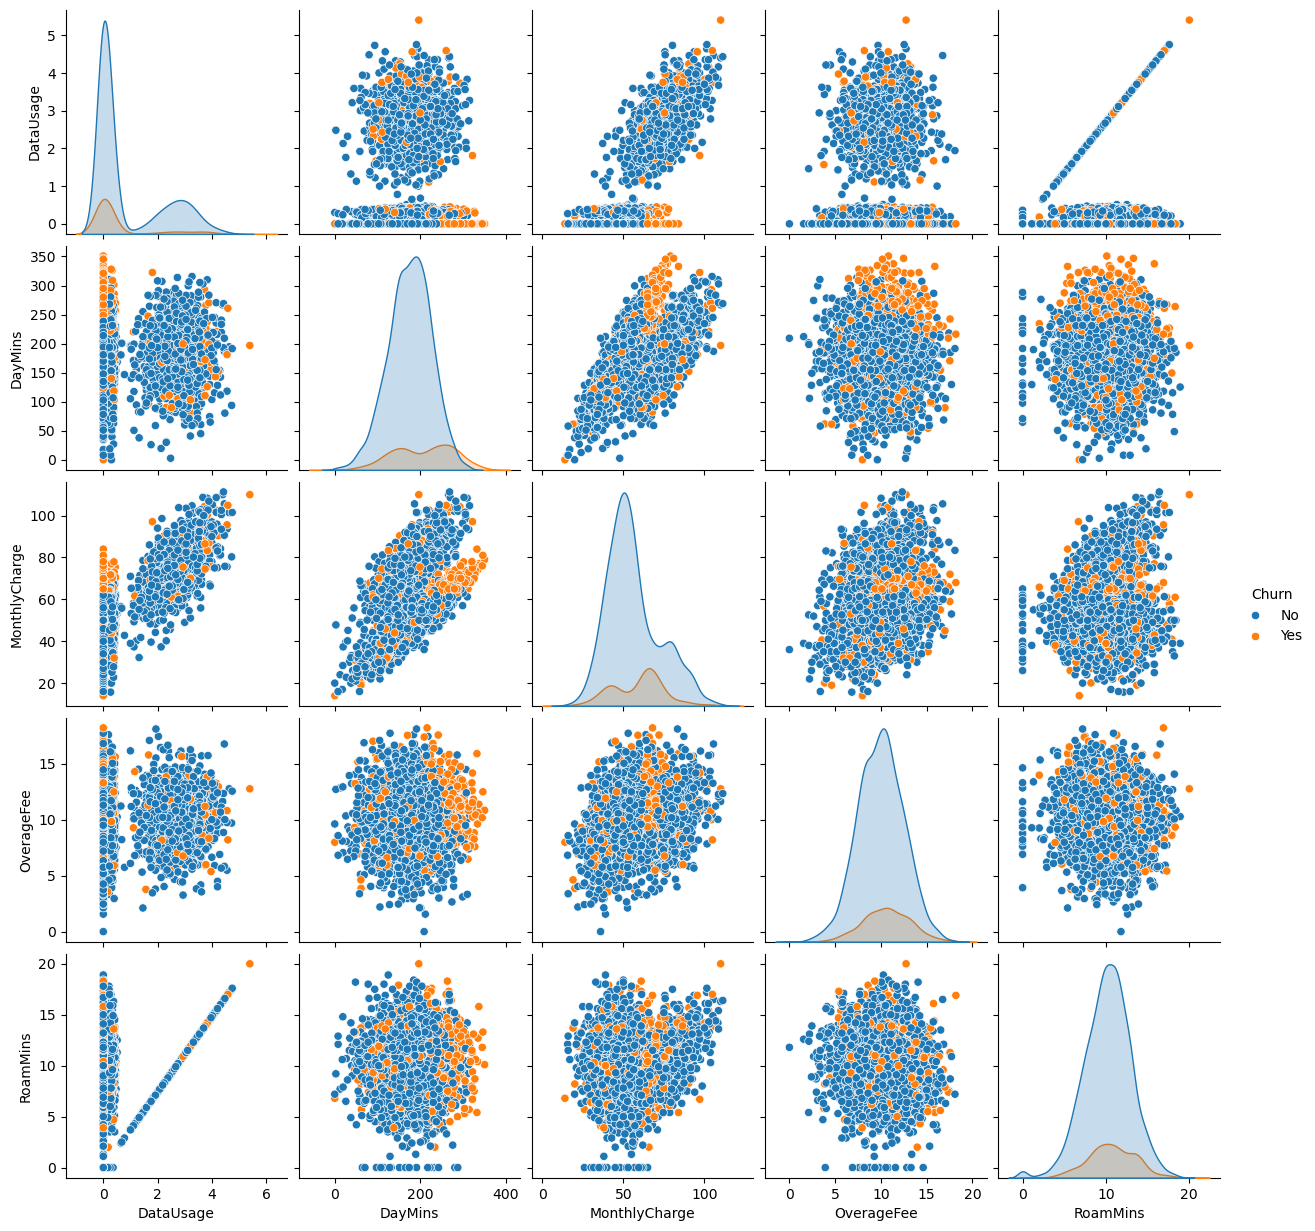

In [119]:
sns.pairplot(data = df_cat, hue = 'Churn', vars = ('DataUsage', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins'))
plt.show()

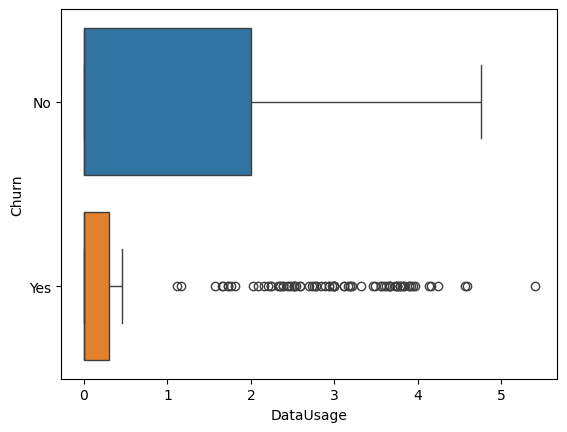

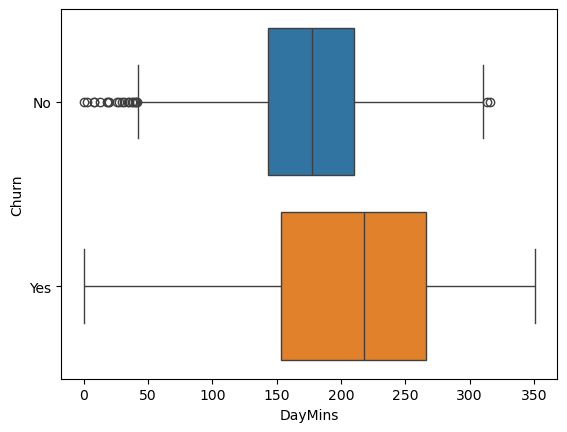

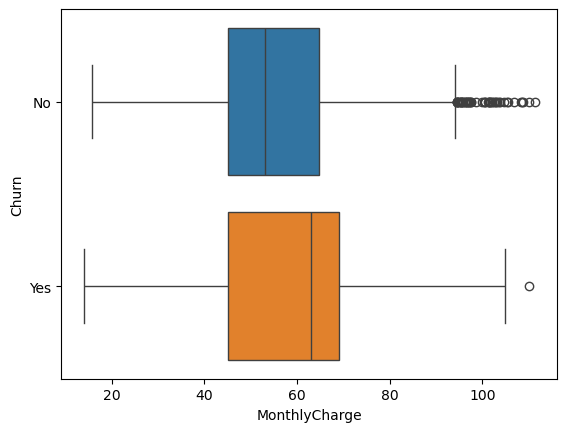

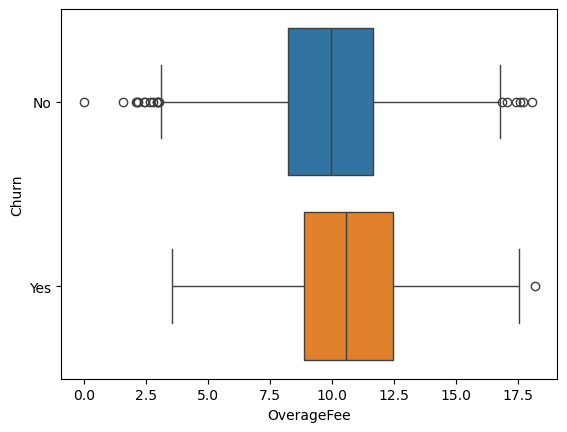

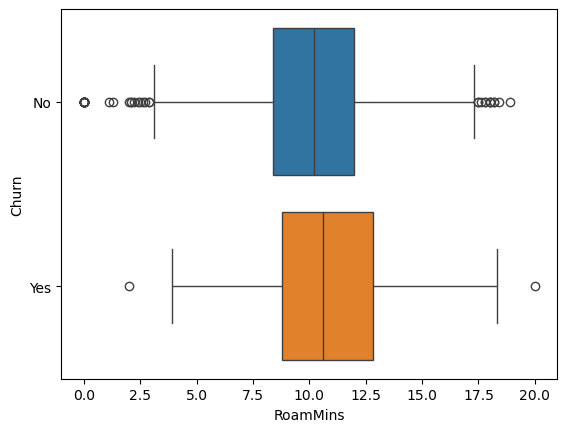

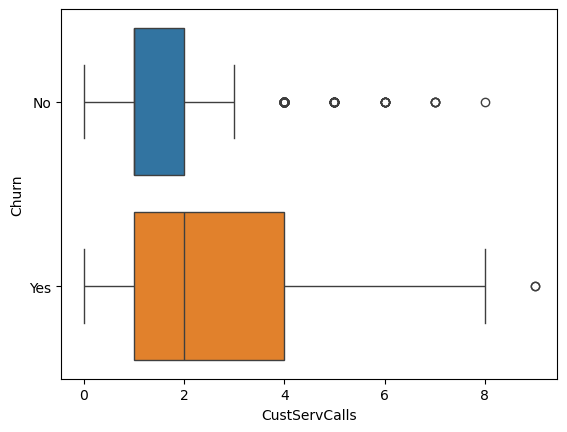

In [120]:
vars = ['DataUsage', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'CustServCalls'] 
for i, var in enumerate(vars):
    sns.boxplot(data = df_cat, x = var, y = 'Churn', hue = 'Churn')
    plt.show()

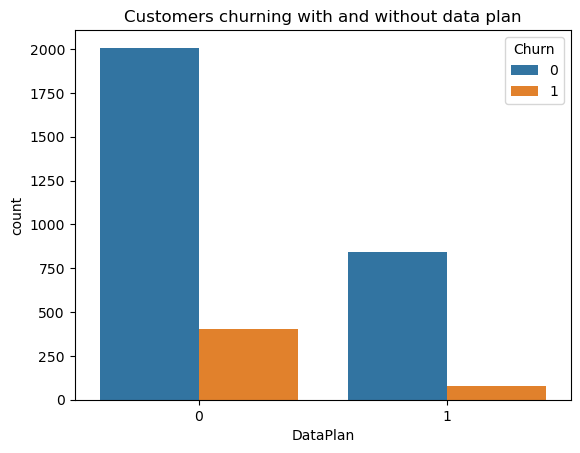

In [121]:
plot = sns.countplot(x='DataPlan',hue = 'Churn', data=df)
plot.set_title('Customers churning with and without data plan')
plt.show()

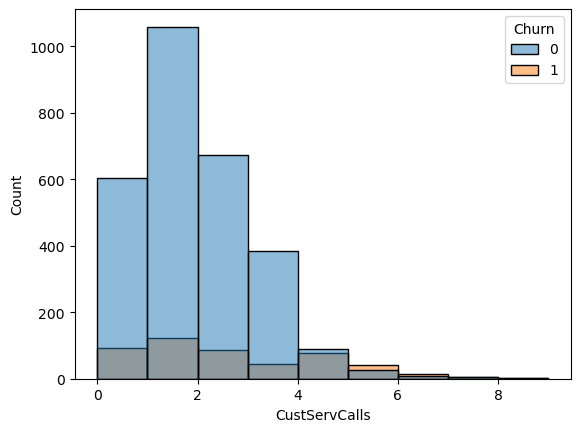

In [122]:
calls_hist = sns.histplot(data=df, x='CustServCalls', hue='Churn', binwidth=1)
plt.show()

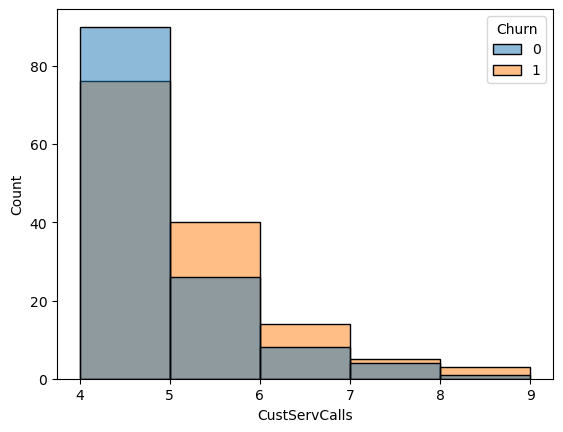

In [123]:
close_hist = sns.histplot(data=df[df['CustServCalls']>=4], x="CustServCalls", hue="Churn", binwidth=1)
plt.show()

## Data Preprocessing 

In [124]:
df_cat["Churn"] = df_cat["Churn"].apply(lambda x: 0 if x == 'No' else 1)
df_cat["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [125]:
df_cat["DataPlan"] = df_cat["DataPlan"].apply(lambda x: 0 if x == 'No' else 1)
df_cat["DataPlan"].value_counts()

DataPlan
0    2411
1     922
Name: count, dtype: int64

In [126]:
df_cat.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [127]:
X = df_cat.drop(columns=['Churn','RoamMins','AccountWeeks','DayCalls'])
y = df_cat['Churn']

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [129]:
X_y_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis = 1)

In [130]:
X_y_train.head()

,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,MonthlyCharge,OverageFee,Churn
0,1,0,0.00,2,117.3,38.0,10.44,0
1,0,0,0.00,2,148.2,39.0,7.98,0
2,1,0,0.00,2,186.8,47.0,8.69,0
3,1,0,0.42,0,119.1,49.2,14.39,0
4,1,0,0.00,3,168.2,43.0,8.09,0


In [131]:
churned_X_y = X_y_train[X_y_train["Churn"] == 1]

In [132]:
not_churned_X_y = X_y_train[X_y_train["Churn"] == 0]

In [133]:
X_y_train["Churn"].value_counts()

Churn
0    2283
1     383
Name: count, dtype: int64

In [134]:
count_not_churned, count_churned = X_y_train["Churn"].value_counts()

In [135]:
not_churned_sample_X_y = not_churned_X_y.sample(n=count_churned)    #Undersampling not churned to balance dataset 

In [136]:
X_y_train_under = pd.concat([churned_X_y, not_churned_sample_X_y], axis = 0)

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [138]:
X_train = X_y_train_under.drop(columns=["Churn"])
X_train = scaler.fit_transform(X_train)

In [139]:
X_test = scaler.transform(X_test)

In [140]:
y_train = X_y_train_under.loc[:, "Churn"]

## KNN Model

In [141]:
neighbors = np.arange(1, 30)

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
error_rate = []

In [144]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

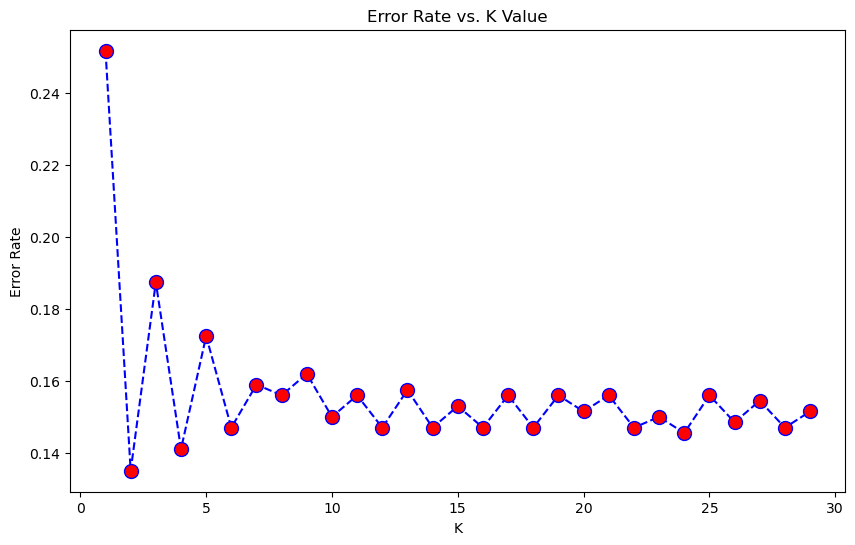

In [145]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [147]:
kf_knn = KFold(n_splits=4, shuffle=True, random_state=22)

In [148]:
best_knn = KNeighborsClassifier(n_neighbors=3)

In [149]:
cv_score_knn = cross_val_score(best_knn, X_train, y_train, cv=kf_knn)

In [150]:
print(cv_score_knn)

[0.828125   0.84895833 0.82198953 0.80104712]


In [151]:
best_knn.fit(X_train,y_train)
pred = best_knn.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 

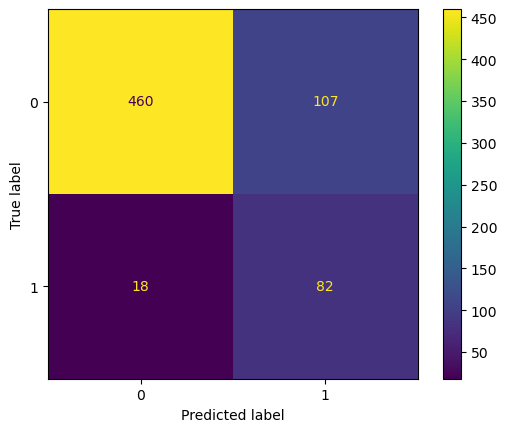

In [153]:
knn_cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(knn_cm).plot()
plt.show()

In [154]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       567
           1       0.43      0.82      0.57       100

    accuracy                           0.81       667
   macro avg       0.70      0.82      0.72       667
weighted avg       0.88      0.81      0.83       667



## Logistic Regression 

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
params_log = {
    "C": np.linspace(0.01, 100, 10),
    "penalty": ["l1", "l2"],
    "random_state": [22]}

In [157]:
lr = LogisticRegression()

In [158]:
kf_log = KFold(n_splits=4, shuffle=True, random_state=22)

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
grid_log = GridSearchCV(estimator=LogisticRegression(), param_grid=params_log, cv=kf_log, scoring="accuracy")

In [161]:
grid_log.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

GridSearchCV(cv=KFold(n_splits=4, random_state=22, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.000e-02, 1.112e+01, 2.223e+01, 3.334e+01, 4.445e+01, 5.556e+01,
       6.667e+01, 7.778e+01, 8.889e+01, 1.000e+02]),
                         'penalty': ['l1', 'l2'], 'random_state': [22]},
             scoring='accuracy')

In [162]:
grid_log.best_params_

{'C': 11.12, 'penalty': 'l2', 'random_state': 22}

In [163]:
lr = LogisticRegression(penalty='l2', C=22.23, random_state=22)

In [164]:
lr.fit(X_train, y_train)

LogisticRegression(C=22.23, random_state=22)

In [165]:
log_pred = lr.predict(X_test)

In [166]:
cm_log = confusion_matrix(y_test,log_pred)

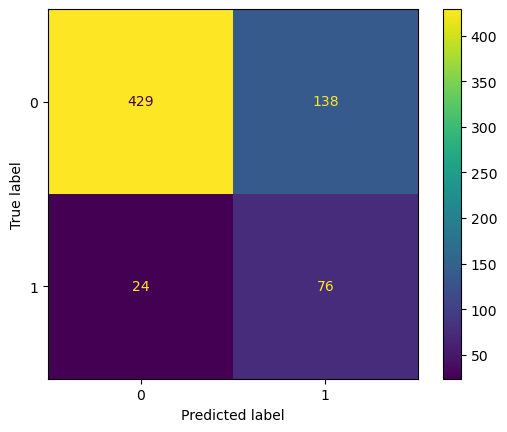

In [167]:
ConfusionMatrixDisplay(cm_log).plot()
plt.show()

In [168]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       567
           1       0.36      0.76      0.48       100

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667



## Support Vector Machine 

In [175]:
params_svc = {
    "degree": [1, 2],
    "C": np.linspace(0.01, 100, 15),
    "gamma": np.linspace(0.0001, 100, 15),
    "random_state": [22],
    "probability": [True]
}

In [176]:
kf_svc = KFold(n_splits=4, shuffle=True, random_state=22)

In [177]:
from sklearn.svm import SVC

In [178]:
grid_svc = GridSearchCV(estimator=SVC(), param_grid=params_svc, cv=kf_svc, scoring="accuracy")

In [179]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=22, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.00000000e-02, 7.15214286e+00, 1.42942857e+01, 2.14364286e+01,
       2.85785714e+01, 3.57207143e+01, 4.28628571e+01, 5.00050000e+01,
       5.71471429e+01, 6.42892857e+01, 7.14314286e+01, 7.85735714e+01,
       8.57157143e+01, 9.28578571e+01, 1.00000000e+02]),
                         'degree': [1, 2],
                         'gamma': array([1.000000e-04, 7.142950e+00, 1.428580e+01, 2.142865e+01,
       2.857150e+01, 3.571435e+01, 4.285720e+01, 5.000005e+01,
       5.714290e+01, 6.428575e+01, 7.142860e+01, 7.857145e+01,
       8.571430e+01, 9.285715e+01, 1.000000e+02]),
                         'probability': [True], 'random_state': [22]},
             scoring='accuracy')

In [181]:
grid_svc.best_params_

{'C': 7.152142857142857,
 'degree': 1,
 'gamma': 7.14295,
 'probability': True,
 'random_state': 22}

In [184]:
svm = SVC(C=7.152142857142857, degree=1, gamma=7.14295, probability=True, random_state=22)

In [186]:
svm.fit(X_train, y_train)

SVC(C=7.152142857142857, degree=1, gamma=7.14295, probability=True,
    random_state=22)

In [188]:
svm_pred = svm.predict(X_test)

In [189]:
cm_svc = confusion_matrix(y_test, svm_pred)

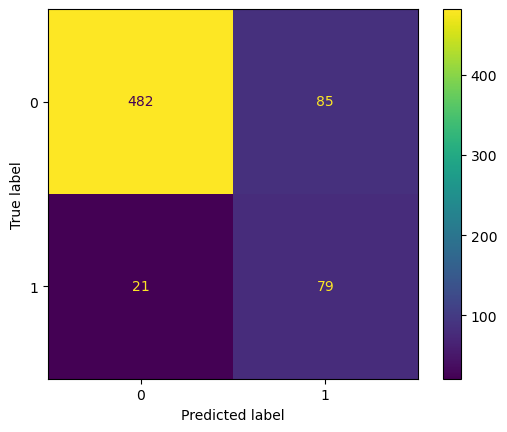

In [190]:
ConfusionMatrixDisplay(cm_svc).plot()
plt.show()

In [192]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       567
           1       0.48      0.79      0.60       100

    accuracy                           0.84       667
   macro avg       0.72      0.82      0.75       667
weighted avg       0.89      0.84      0.86       667

